# Part 1: Data processing

Dataset link: https://www.kaggle.com/aniruddhachoudhury/esigning-of-loan-based-on-financial-history?select=financial_data.csv

## Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset= pd.read_csv('/content/financial_data.csv')

## Data exploration

In [ ]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [ ]:
dataset.shape

(17908, 21)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [ ]:
#Statistical summary
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Dealing with the null values


In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isnull().values.sum()

0

## Encoding categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['pay_schedule'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

1

In [ ]:
dataset['pay_schedule'].nunique()

4

In [ ]:
dataset.shape

(17908, 21)

In [ ]:
dataset = pd.get_dummies(data = dataset, drop_first= True)

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [ ]:
dataset.shape

(17908, 23)

In [ ]:
len(dataset.select_dtypes(include='object').columns)

0

## Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


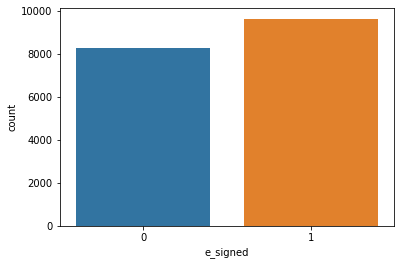

In [ ]:
sns.countplot(dataset['e_signed'])

In [ ]:
# e signed values
(dataset.e_signed == 1).sum()

9639

In [ ]:
# not e-signed values
(dataset.e_signed == 0).sum()

8269

## Restructure the dataset

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [ ]:
dataset['months employed'] =(dataset.months_employed + dataset.years_employed*12)

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [ ]:
dataset = dataset.drop(columns=['months_employed','years_employed'])

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [ ]:
dataset['personnal accounts months'] =(dataset.personal_account_m + dataset.personal_account_y*12)

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personnal accounts months
0,7629673,40,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [ ]:
dataset = dataset.drop(columns=['personal_account_m','personal_account_y'])

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personnal accounts months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


## Correlation matrix and heatmap

In [ ]:
dataset_2= dataset.drop(columns=['entry_id','e_signed'])

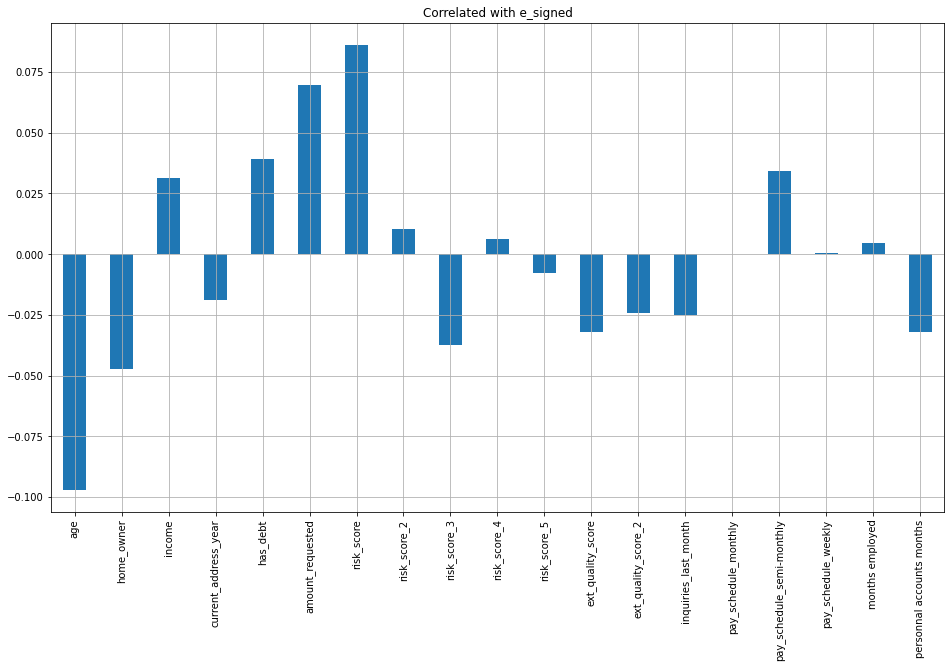

In [ ]:
dataset_2.corrwith(dataset['e_signed']).plot.bar(
    figsize=(16,9), title='Correlated with e_signed', grid= True
    )


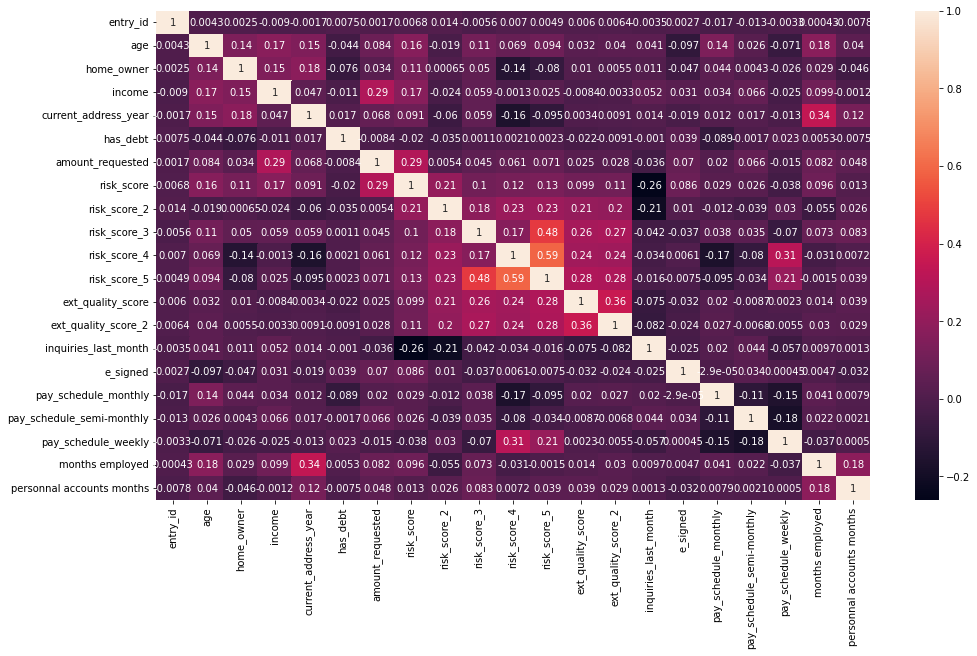

In [ ]:
#heatmap
plt.figure(figsize=(16,9))
ax = sns.heatmap(dataset.corr(), annot = True)

## Splitting the dataset

In [ ]:
# independent variables/ matrix features
x= dataset.drop(columns=['entry_id','e_signed'])

In [ ]:
# target variables
y = dataset['e_signed']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [ ]:
x_train.shape

(14326, 19)

In [ ]:
x_test.shape

(3582, 19)

In [ ]:
y_train.shape


(14326,)

In [ ]:
y_test.shape

(3582,)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

In [ ]:
x_test

array([[-1.00512357, -0.87487238, -0.23413754, ..., -0.52631297,
        -1.15429073, -0.30903953],
       [-1.00512357, -0.87487238, -0.32643913, ..., -0.52631297,
        -0.26515435,  0.19196957],
       [ 0.27347128, -0.87487238, -0.58686149, ..., -0.52631297,
         2.84682297, -0.81004863],
       ...,
       [-0.06748734, -0.87487238, -0.4022583 , ..., -0.52631297,
         1.06855022,  0.3589726 ],
       [-0.23796666, -0.87487238, -0.24732348, ..., -0.52631297,
         0.62398203,  0.19196957],
       [-0.06748734, -0.87487238, -0.70883146, ...,  1.90001016,
        -0.26515435,  1.69499687]])

# Part 2: Building the Model

## 1)Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier_lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.5639307649357901

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 669,  985],
       [ 577, 1351]])

## 2) SVM

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state=0)
classifier_svc.fit(x_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred= classifier_svc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)

0.592964824120603

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 805,  849],
       [ 609, 1319]])

## 3) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state= 0)
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred= classifier_rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)

0.6247906197654941

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 958,  696],
       [ 648, 1280]])

## 4) XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state= 0)
classifier_xgb.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred= classifier_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)

0.6342825237297599

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 898,  756],
       [ 554, 1374]])

# Part 3: Applying Randomized search to find the best parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters= {
    'learning_rate':[0.05, 0.10,0.15,0.20,0.25,0.30],
    'max_depth':[2,3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.00,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
    'n_estimators':[100,200,500],
    'subsample':[0.5,0.7,1.0]
}

In [ ]:
parameters

{'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'n_estimators': [100, 200, 500],
 'subsample': [0.5, 0.7, 1.0]}

In [ ]:
random_cv = RandomizedSearchCV(estimator= classifier_xgb, 
                  param_distributions= parameters, n_iter= 5,
                  scoring ='roc_auc',n_jobs= -1, cv=5,verbose=3)

In [ ]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_cv.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, max_depth=4, n_estimators=500,
              subsample=1.0)

In [ ]:
random_cv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 1.0}

In [ ]:
random_cv.best_score_

0.6953568455420316

# Part 4:Final model(XGBoost Classifier)

In [ ]:
from xgboost import XGBClassifier
classifier= XGBClassifier(colsample_bytree=0.7, gamma=0.0, max_depth=4, n_estimators=500,
              subsample=1.0)
classifier.fit(x_train,y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.0, max_depth=4, n_estimators=500,
              subsample=1.0)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)


0.6398659966499163

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 967,  687],
       [ 603, 1325]])

## Part 5: Predicting a single observation

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personnal accounts months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [ ]:
single_obs= [[45,	1,	2500,	3,	1, 600,	37000,	0.737398,	0.9035,	0.4877,	0.515977,	0.580918,	0.380918,	10,	0,	0,	0	,36	,30]]

In [ ]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)